# DSCI 521: Data Analysis and Interpretation <br> Term Project Phase 1: Walmart Sales Forecasting- EDA


### Team Members
- Group member 1
    - Name: Padma Priya Jayaraj
    - Email: pj349@drexel.edu
- Group member 2
    - Name: Soumya Sinha
    - Email: ss4947@drexel.edu
- Group member 3
    - Name: Himani Hasani
    - Email: hh579@drexel.edu
- Group member 4
    - Name: Nishant Anand
    - Email: na826@drexel.edu

## Data
The dataset is a historical dataset provided by Walmart for a competition on [Kaggle](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data) .The timeseries data ranges from Feb,2010 to November 2012. The analysis would be on a weekly basis as the dataset provides sales information for every week in the mentioned timeframe.
Following information is provided in the dataset.

- **Store**:The store number
- **Dept**:The department number
- **Date**:The week of the year
- **Weekly_Sales**:Sales for the given department in the given store
- **IsHoliday**:Whether the week is a special holiday week
- **Temperature**:Average temperature in the region
- **Fuel_Price**:Cost of fuel in the region
- **MarkDown1-5**:Anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- **CPI**:The consumer price index
- **Unemployment**:The unemployment rate
- **IsHoliday**:Whether the week is a special holiday week
- **Type**:Type of the store
- **Size**:Size of the store

## Exploratory Data Analysis

Importing required files

In [2]:
import numpy as np 
import pandas as pd
import statistics
import scipy
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skl

Loading feature.csv

In [4]:
new_features = pd.read_csv("Walmart_data/features.csv")
new_features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Loading stores.csv

In [5]:
new_stores = pd.read_csv("Walmart_data/stores.csv")
new_stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Loading train.csv

In [6]:
new_train = pd.read_csv("Walmart_data/train.csv")
del new_train['IsHoliday']
new_train.head(5)

,Store,Dept,Date,Weekly_Sales
0,1,1,2010-02-05,24924.50
1,1,1,2010-02-12,46039.49
2,1,1,2010-02-19,41595.55
3,1,1,2010-02-26,19403.54
4,1,1,2010-03-05,21827.90


In [7]:
new1_concat = pd.merge(new_train, new_features,  how='left', left_on=['Store','Date'], right_on = ['Store','Date'])
new_concat = new1_concat.merge(new_stores, left_on='Store', right_on='Store')
new_concat.set_index('Store',inplace=True)
new_concat.to_csv("data/New_Merged_walmart.csv")
merged_walmart = pd.read_csv("data/New_Merged_walmart.csv", parse_dates=["Date"])
merged_walmart.head(5)

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


#### Splitting the Date into Months, Year, Week and Day

In [8]:
merged_walmart['Year']=merged_walmart['Date'].dt.year
merged_walmart['Month']=merged_walmart['Date'].dt.month
merged_walmart['Week']=merged_walmart['Date'].dt.week
merged_walmart['Day']=merged_walmart['Date'].dt.day

#### Missing Data

All the cloumns have no missing data apart from the Markdown columns. All Markdown columns have more than 60% missing data. Each of them have been listed below:
- MarkDown1 = 64% missing data
- Markdown2 = 70% missing data
- Markdown3 = 67% missing data
- Markdown4 = 68% missing data
- Markdown5 = 64% missing data 

There is no data available for Markdown columns before November 2011. This is because, before 2011 Walmart was reluctant to share its data but to understand customers better, they agreed to share scan data with external research firms to analyze customer behavior. 
[source](https://retailwire.com/discussion/walmart-to-share-scan-data/#:~:text=Walmart%20says%20it%20wants%20to%20better%20understand%20its%20customers.&text=Since%20Walmart%20first%20made%20the,to%20fully%20understanding%20the%20market)


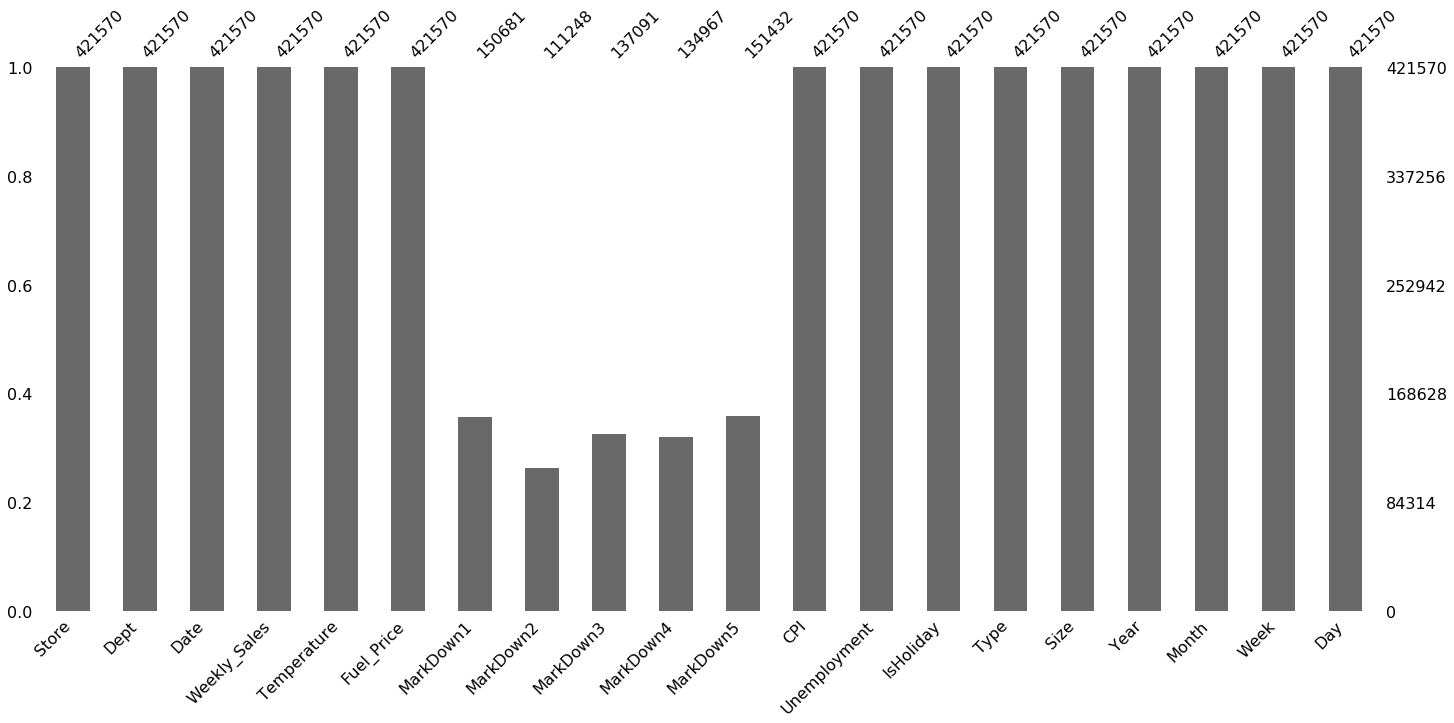

In [9]:
import missingno as msno 
msno.bar(merged_walmart)

#### Exploring the Data Types of all the variables

In [10]:
pd.DataFrame(merged_walmart.dtypes, columns=['Type'])

,Type
Store,int64
Dept,int64
Date,datetime64[ns]
Weekly_Sales,float64
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64


The dataset represents sales data from 45 stores and 99 departments in them. Average weekly sales across all stores is 15981. The average temperature varies from store to store varying from -2 Fahrenheit to 100 Fahrenheit. This shows that the stores chosen belong to different regions in the United States as states in North have lower temperatures as compared to temperature in states in the South-West. The variation of fuel price shows that the fuel prices have gone high over the years due to changing economic conditions. But the variation in fuel price is not too high. The Markdown columns have the most amount of missing data. The CPI has changed from a minimum of 126 to a maximum of 227 in the given dataset. This explains that there has been constant growth in the price of consumer goods. The unemployment rate is provided for different stores. The average unemployment is high in the selected stores with a maximum of 14 in some store. The size of stores varies largely. This is can be seen by the the large value of standard deviation in the size column. The size of the store depends on where it is located. Thus a larger store might be seen in an area with higher population but areas with low population might not require it.

In [11]:
merged_walmart.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Week,Day
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,2010.968591,6.449510,25.826762,15.673131
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,0.796876,3.243217,14.151887,8.753549
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2010.000000,4.000000,14.000000,8.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,2011.000000,6.000000,26.000000,16.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,2012.000000,9.000000,38.000000,23.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,52.000000,31.000000


In [12]:
merged_walmart = merged_walmart.drop(['Date'], axis = 1)

#### Creating a copy of the dataframe before data preprocessing

In [13]:
merged_walmart_copy = merged_walmart.copy()

In [14]:
##Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_walmart_copy['IsHoliday']=le.fit_transform(merged_walmart_copy['IsHoliday'])
merged_walmart_copy['Type']=le.fit_transform(merged_walmart_copy['Type'])

In [15]:
#Simple Imputor Function
from sklearn.impute import SimpleImputer
si = SimpleImputer()
merged_walmart_copy=pd.concat([merged_walmart_copy.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1),pd.DataFrame(si.fit_transform(merged_walmart_copy[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]), columns=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'])],axis=1)

#### Final Dataset

In [16]:
merged_walmart_copy.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Week,Day,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,24924.50,42.31,2.572,211.096358,8.106,0,0,151315,2010,2,5,5,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
1,1,1,46039.49,38.51,2.548,211.242170,8.106,1,0,151315,2010,2,6,12,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
2,1,1,41595.55,39.93,2.514,211.289143,8.106,0,0,151315,2010,2,7,19,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
3,1,1,19403.54,46.63,2.561,211.319643,8.106,0,0,151315,2010,2,8,26,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
4,1,1,21827.90,46.50,2.625,211.350143,8.106,0,0,151315,2010,3,9,5,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079


#### Sample Time Series data for Store id =1 and Department id=1

In [17]:
store1=merged_walmart_copy[merged_walmart_copy['Store']==1]
store1Dept1=store1[store1['Dept']==1]
store1Dept1

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size,Year,Month,Week,Day,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,1,1,24924.50,42.31,2.572,211.096358,8.106,0,0,151315,2010,2,5,5,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
1,1,1,46039.49,38.51,2.548,211.242170,8.106,1,0,151315,2010,2,6,12,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
2,1,1,41595.55,39.93,2.514,211.289143,8.106,0,0,151315,2010,2,7,19,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
3,1,1,19403.54,46.63,2.561,211.319643,8.106,0,0,151315,2010,2,8,26,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
4,1,1,21827.90,46.50,2.625,211.350143,8.106,0,0,151315,2010,3,9,5,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,1,18947.81,76.08,3.666,222.981658,6.908,0,0,151315,2012,9,39,28,3666.270000,7.640000,1.650000,1417.960000,4744.280000
139,1,1,21904.47,68.55,3.617,223.181477,6.573,0,0,151315,2012,10,40,5,8077.890000,3334.628621,18.220000,3617.430000,3626.140000
140,1,1,22764.01,62.99,3.601,223.381296,6.573,0,0,151315,2012,10,41,12,2086.180000,3334.628621,8.110000,602.360000,5926.450000
141,1,1,24185.27,67.97,3.594,223.425723,6.573,0,0,151315,2012,10,42,19,950.330000,3334.628621,4.930000,80.250000,2312.850000


#### Correlation 

Following correlation matrix is for Store=1 and Dept=1, in this 
- Unemployemnt and CPI are very highly negatively correlated which means as Unemployment increases, CPI decreases
- Year and Unemployment are highly negatively correlated, according to census more people are educated as each year passes
- CPI and Fuel Price are positively correlated because fuel is the main source for automobile transportation, so if the fuel price increases, the end products costs also increase
- Day and Markdown1 are highly correleated,meaning some promotional offers are related to specific days of the month.



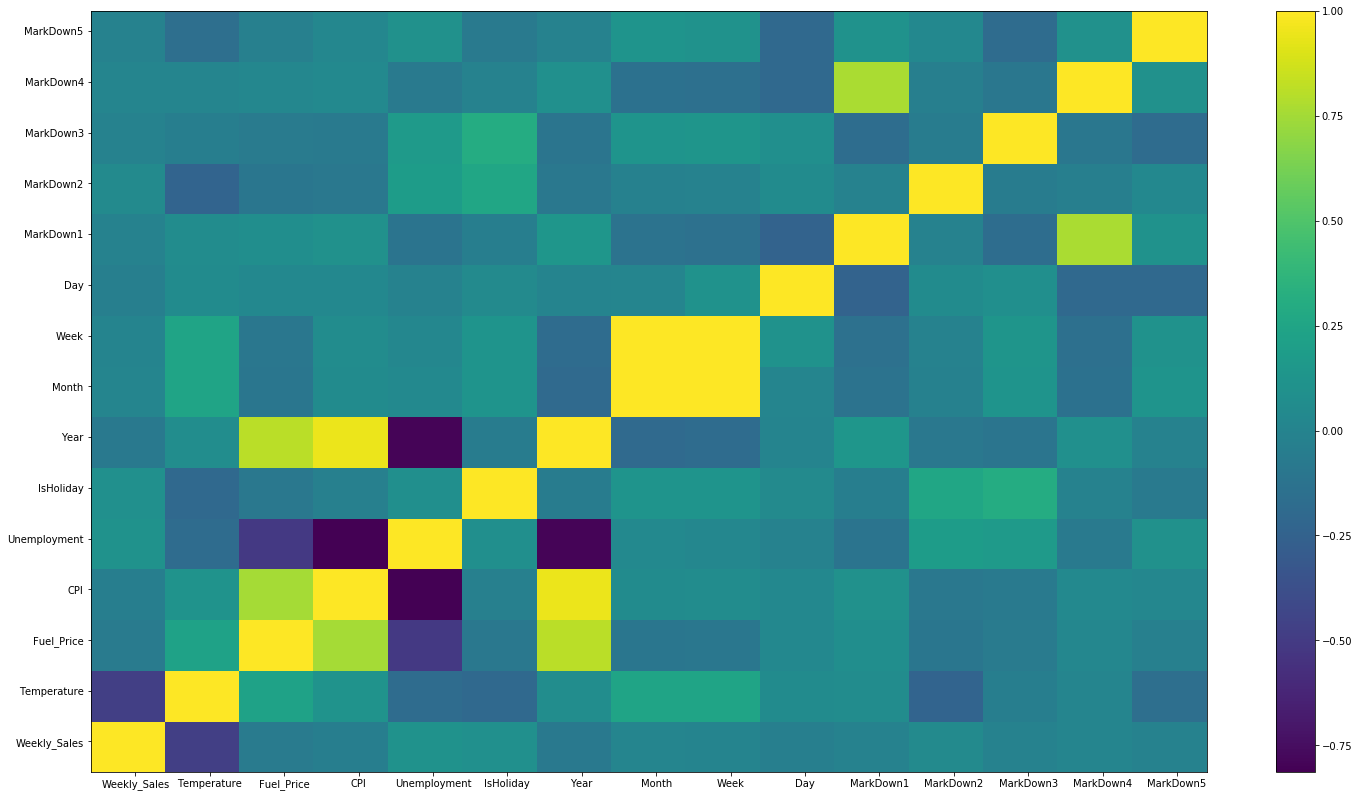

In [18]:
fig = plt.figure(figsize=(25, 14))
corr = store1Dept1.corr()
##Store,Dept,type,Size are removed as they have all same values, adding them doesn't make sense in correlation
corr1 = corr.drop(['Store','Dept','Type','Size'],axis = 1)
corr2 = corr1.drop(['Store','Dept','Type','Size'],axis = 0)
c = plt.pcolor(corr2)
plt.yticks(np.arange(0.6, len(corr2.index), 1), corr2.index)
plt.xticks(np.arange(0.6, len(corr2.columns), 1), corr2.columns)
fig.colorbar(c)

#### Boxplot for sizes of types of stores

Below boxplot shows that Store Type A is the largest and store type C is the smallest in terms of Size. So it might be interesting to observe the weekly sales comparsion between these stores given that A is the largest store.

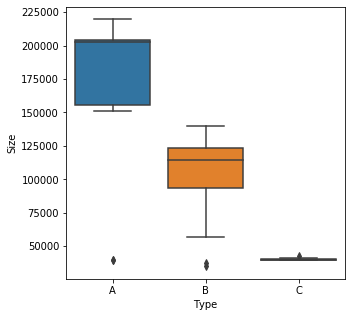

In [19]:
type_store = pd.concat([new_stores['Type'], new_stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='Type', y='Size', data=type_store)

From the below box plot, Type A makes more sales when compared to B and C. The larger store makes more sales.

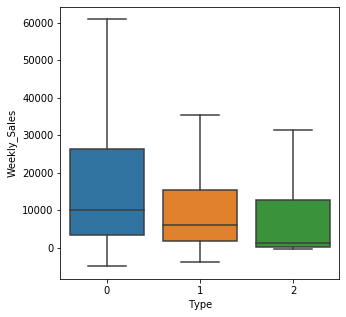

In [20]:
type_sales = pd.concat([merged_walmart_copy['Type'], merged_walmart_copy['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(5, 5))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=type_sales,showfliers=False )

Weekly Sales is more when the temperature is 30-80 and its relatively low when the temperature is too low as well as when it is too high

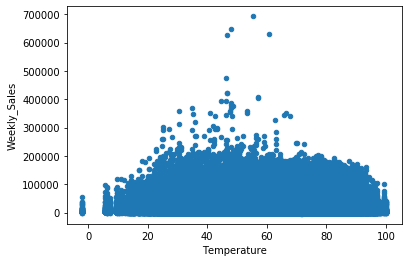

In [21]:
fig = merged_walmart_copy.plot.scatter("Temperature", "Weekly_Sales")

December and November makes more weekly sales when compared to other months due to major holiday seasons like Thanksgiving and Christmas

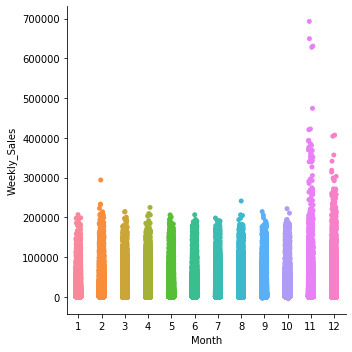

In [22]:
month_sales = pd.concat([merged_walmart_copy['Month'], merged_walmart_copy['Weekly_Sales']], axis=1)
graph = sns.catplot(x='Month', y="Weekly_Sales", data=month_sales)

#### Stores with highest Unemployment 
The umemployment rate is higher in areas of stores 31, 30, 25, 21, 20 and 2. A reason for higher unemployment in these areas could be beacuse of the jobs people lost around The Great Recession of 2008.

Text(0.5, 0, 'Store')

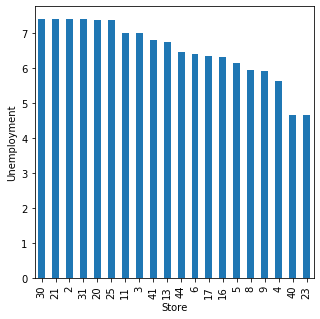

In [23]:
store_unemp=new_features.groupby(['Store']).mean()['Unemployment'].sort_values(ascending=False).tail(20).plot(kind='bar',figsize=(5,5))
store_unemp.set_ylabel("Unemployment")
store_unemp.set_xlabel("Store")

#### CPI across all the Stores

A high CPI across all stores is observed. This indicates inflation in prices of goods and services across various stores.

Stores 22 and 35 have a comparatively low CPI, thus the price of goods in these stores might be less as compared to others. This might a reason to attract more consumers to these stores. Another reason could be that these stores are located in remote locations, therefore their sell might below. Also, the goods in these stores might be outdated resulting in lower prices of goods in these stores.

Text(0, 0.5, 'CPI')

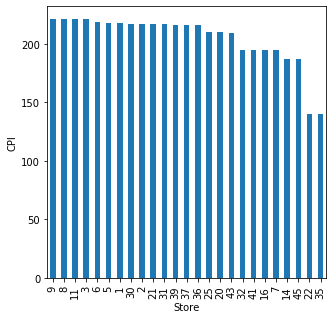

In [24]:
store_cpi=new_features.groupby(['Store']).mean()['CPI'].sort_values(ascending=False).head(25).plot(kind='bar',figsize=(5,5))
store_cpi.set_xlabel("Store")
store_cpi.set_ylabel("CPI")

#### Portion of timeframe with holidays in the week
A pie chart representing Holiday vs non Holiday timeframe has been plotted for all the weeks present in the dataset. This trend would be same across all the 45 stores

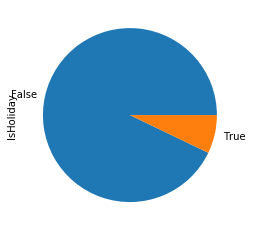

In [25]:
new_features[new_features['Store']==1]['IsHoliday'].value_counts().plot(kind='pie')

#### Department wise weekly sales

All the 45 stores have around 99 departments, so below bar graph shows the weekly sales in every department. Department 92 and 95 have very high weekly sales and it would be interesting to note the similar trend for other stores too.

Text(0, 0.5, 'Weekly_Sales')

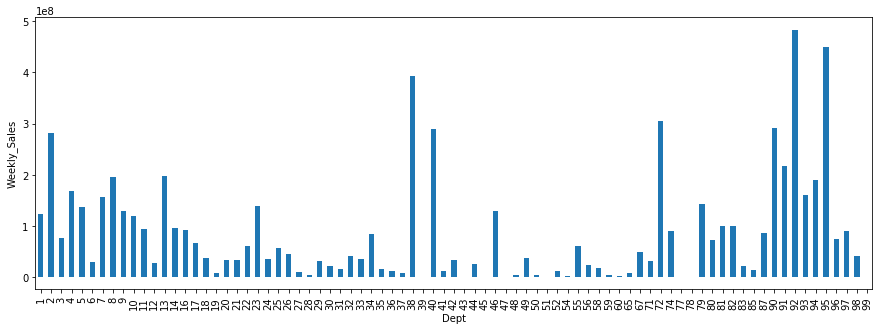

In [26]:
dept_sales=merged_walmart_copy.groupby(['Dept']).sum()['Weekly_Sales'].plot(kind='bar',figsize=(15,5))
dept_sales.set_xlabel("Dept")
dept_sales.set_ylabel("Weekly_Sales")